## Demonstration of Effect Plot
- The effect plot can help you understand how much the combination of weight and feature contributes to the predictions in your data.
- We Start by calculating the effects, which is the weight times the feature value of an instance

__[Refer](https://christophm.github.io/interpretable-ml-book/limo.html#visual-parameter-interpretation)__
 


Importing Required Depedancies

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler    #scale the data to have mean=0 and std=1 
from sklearn.linear_model import LinearRegression
import warnings  #to ignore any warnings
warnings.filterwarnings('ignore')

Reading and preprocessing Dataset

In [76]:
def display_all(df):
    with pd.option_context("display.max_rows",6,"display.max_columns",60):
        display(df)

In [38]:
housing=pd.read_csv('housing_price.csv')
housing=housing.drop(['Unnamed: 0','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)

- There are two independent variables (size of the rooms, No. of rooms) and one target variable: Price.
- Our task is to predict price of the house.
- Both independent variable are not scaled, it can be done using Standardisation.

In [77]:
display_all(housing)

,size,rooms
0,2104,3
1,1600,3
2,2400,3
...,...,...
44,852,2
45,1852,4
46,1203,3


### Target separation

In [44]:
target=housing['price']
housing=housing.drop(['price'],axis=1)

### Standardisation of the dataset 

In [46]:
std=StandardScaler()
X_train=std.fit_transform(housing)

### Fast Prototyping of Linear Regressor

In [48]:
reg=LinearRegression()
reg.fit(X_train,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
weights=reg.coef_
weights_size=weights[0]
weights_rooms=weights[1]

### Calculating the effects as mentioned in the blog.

In [55]:
effect_size=reg.coef_[0]*x[:,0]
effect_rooms=reg.coef_[1]*x[:,1]
data=[effect_size,effect_rooms]

In [73]:
df=pd.DataFrame({'Size':effect_size,'Rooms':effect_rooms})

Text(0.5,1,'Effect Plot')

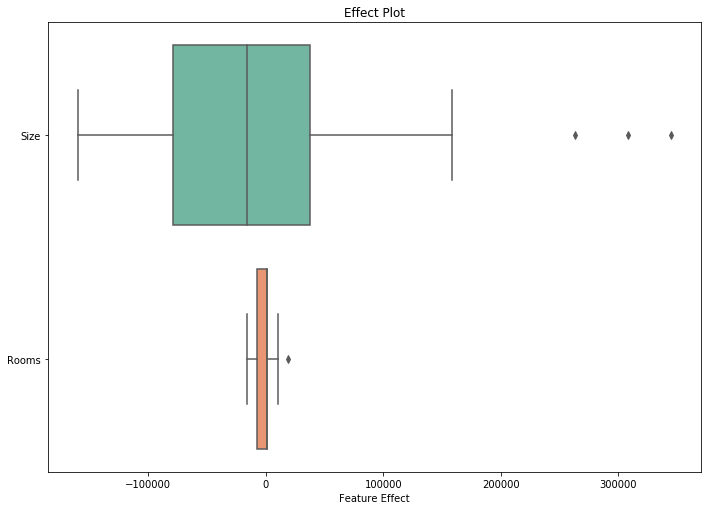

In [75]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
ax = sns.boxplot(data=df, orient="h", palette="Set2")
plt.xlabel('Feature Effect')
plt.title('Effect Plot')